<a href="https://colab.research.google.com/github/rtajeong/M2/blob/main/gg_18_Statistical_Analysis_House_Price_Prediction_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 통계적 분석

- 상관관계가 큰 변수 찾기
- 결측치 처리
- 이상치 처리
- 로그 변환

### 데이터 (주택가격 예측 데이터)
- 아래 캐글 데이터를 다운받는다.
  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [117]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 특성값 설명
- see https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [119]:
df_train.shape

(1460, 81)

### Target (목적변수) 의 특성 파악

In [120]:
# 목적 변수의 통계적 특성
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

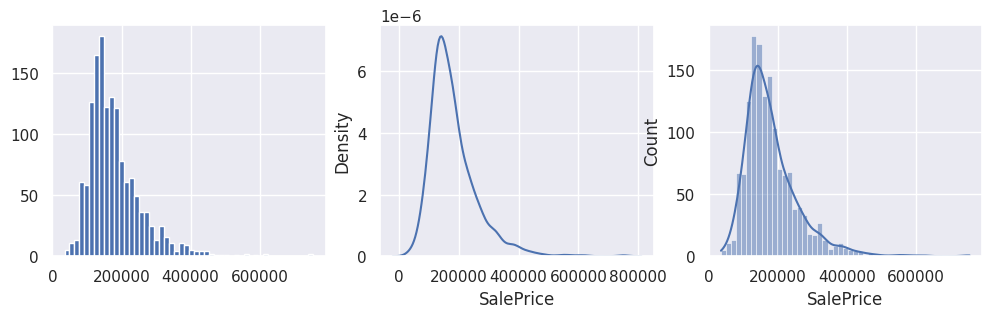

In [121]:
# 3 different ways to explore data distributions
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.hist(df_train['SalePrice'], bins=50)

plt.subplot(1,3,2)
sns.kdeplot(df_train['SalePrice'])

plt.subplot(1,3,3)
sns.histplot(df_train['SalePrice'], kde=True); # kde - kernel density estimation

plt.show()

#### 다음과 같은 특성을 발견할 수 있다.

- Deviate from the normal distribution
- Have appreciable positive skewness
- Show peakedness

- 왜도(skewness, 또는 비대칭도): 분포의 대칭 정도를 나타냄 (+:왼쪽 치우침, -:오른쪽 치우침)
- 첨도(kurtosis): 뾰족한 정도(?)를 나타냄 (정규분포는 0), 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용
  - 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다.
  - 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며,
  - 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다
- 두 특성이 너무 문제가 되면 데이터 변환 실행 (Log, sqaure, square root, inverse, etc.)

In [122]:
# skewness and kurtosis (kurto'sis)
print("Skewness: {:f}".format(df_train['SalePrice'].skew()))
print("Kurtosis: {:f}".format(df_train['SalePrice'].kurt()))

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='SalePrice', ylabel='Count'>

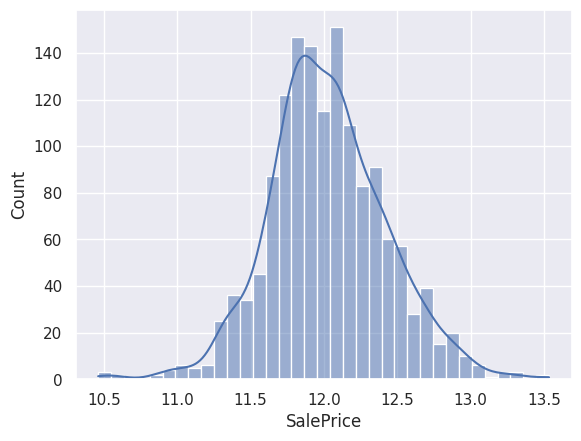

In [123]:
sns.histplot(np.log(df_train['SalePrice']), kde=True)  # log-normal dist

In [124]:
print("Skewness: {:f}".format(np.log(df_train['SalePrice'].skew())))
print("Kurtosis: {:f}".format(np.log(df_train['SalePrice'].kurt())))

Skewness: 0.632800
Kurtosis: 1.877368


### 어떤 변수들이 목적변수와 연관성이 높은가?
- 변수들간의 상관 관계는 correlation (상관관계) 을 보면 알 수 있다.
- 상관관계를 보기 전에 먼저 target 과 특정 변수와의 관계를 보고 싶다면...

In [125]:
# 산포도를 통해 grlivarea 와 saleprice 의 관계를 보자
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head(2)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262


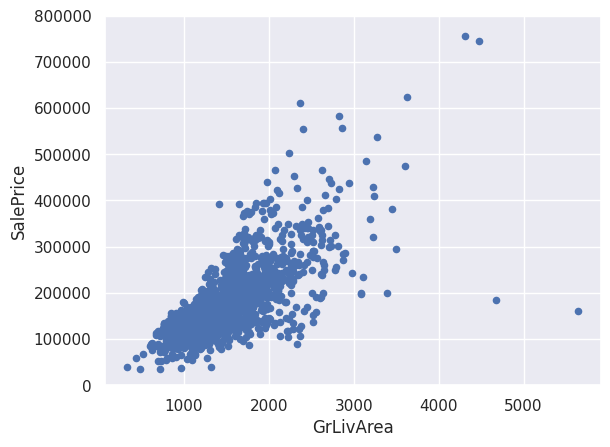

In [126]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [127]:
# plt.scatter 로도 그릴 수 있다.
# data[var].shape, data.SalePrice.shape
# plt.scatter(data[var], data.SalePrice);

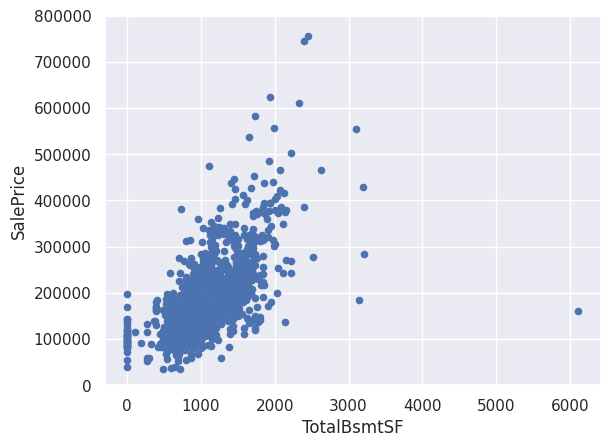

In [128]:
# scatter plot for totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 카테고리 변수와의 관계: 박스플롯으로 보면 편리

In [129]:
print(df_train.shape)
print(df_train['OverallQual'].unique())
print(set(df_train['OverallQual']))
df_train['OverallQual'].value_counts()

(1460, 81)
[ 7  6  8  5  9  4 10  3  1  2]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [130]:
print(df_train['GarageCars'].unique())
df_train['GarageCars'].value_counts()

[2 3 1 0 4]


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [131]:
# 박스플롯 overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head(2)

,SalePrice,OverallQual
0,208500,7
1,181500,6


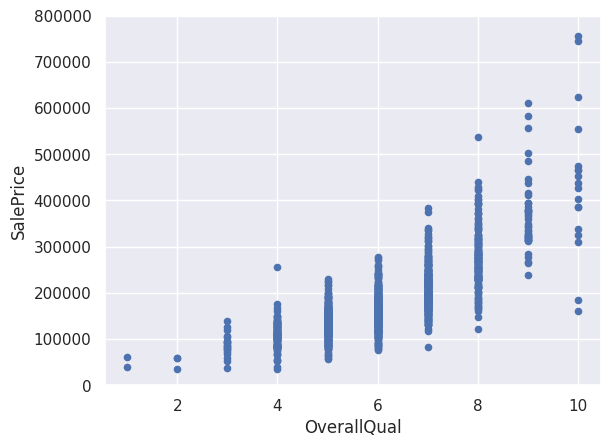

In [132]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### scatter plot 보다는 boxplot 으로 보는 게 좋을 듯...
- df.polt.box() 도 있지만 받아들이는 데이터의 형태가 다름 (dataframe manual 참고)

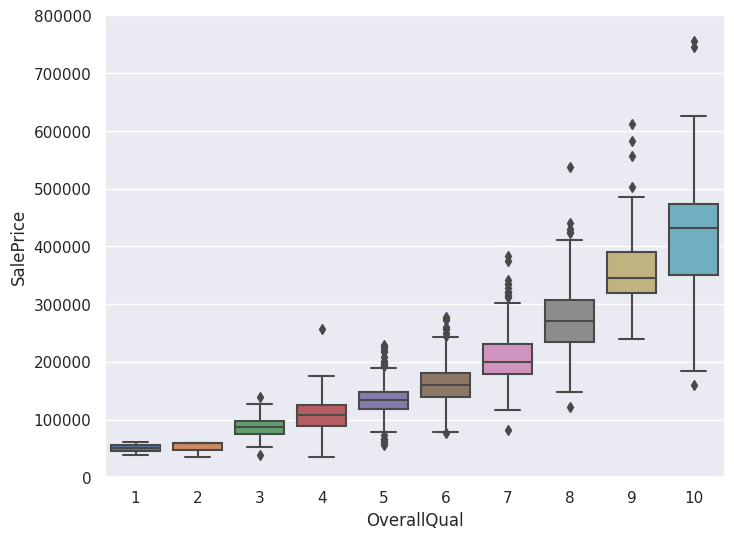

In [133]:
# f, ax = plt.subplots(figsize=(8, 6))
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

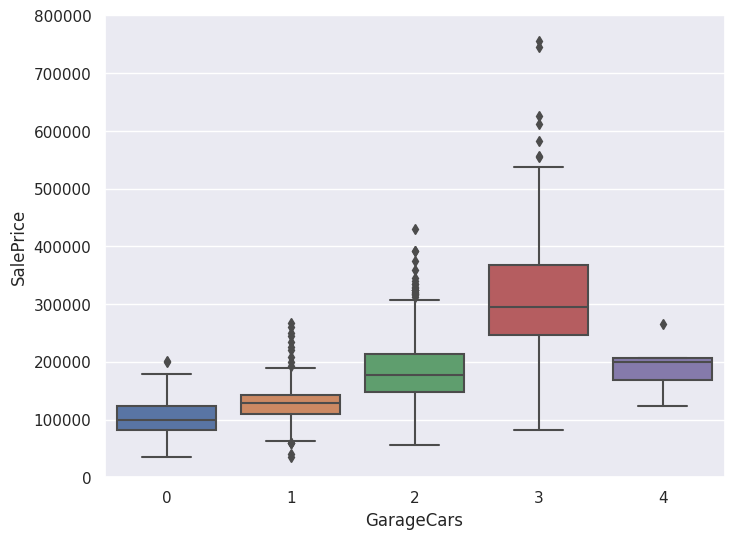

In [134]:
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) # axis=0 은 위아래로 추가.
data.head()
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

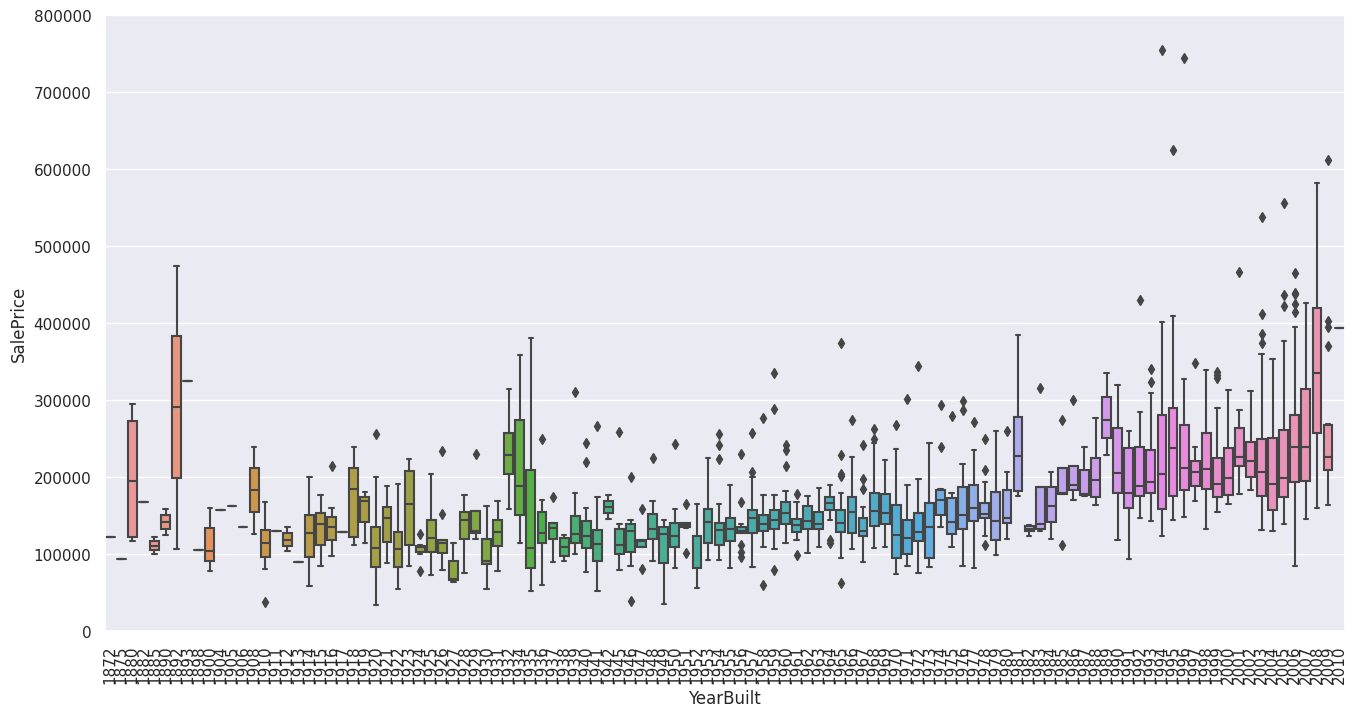

In [135]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

약한 관련성이 있으며 최근의 주택 가격이 높다. 인플레이션이 반영된 가격일 수도 있다.
유용한 특성을 선택하는 것이 문제이다. 이러한 특성 선택을 임의로 주관적으로 수행하는 것은 한계가 있다. 객관적인 방법이 필요하다.

### 객관적으로 판단하는 방법으로는...
- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables

In [136]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [137]:
len(df_train.dtypes[df_train.dtypes != 'object'])   # no. of numerical features

38

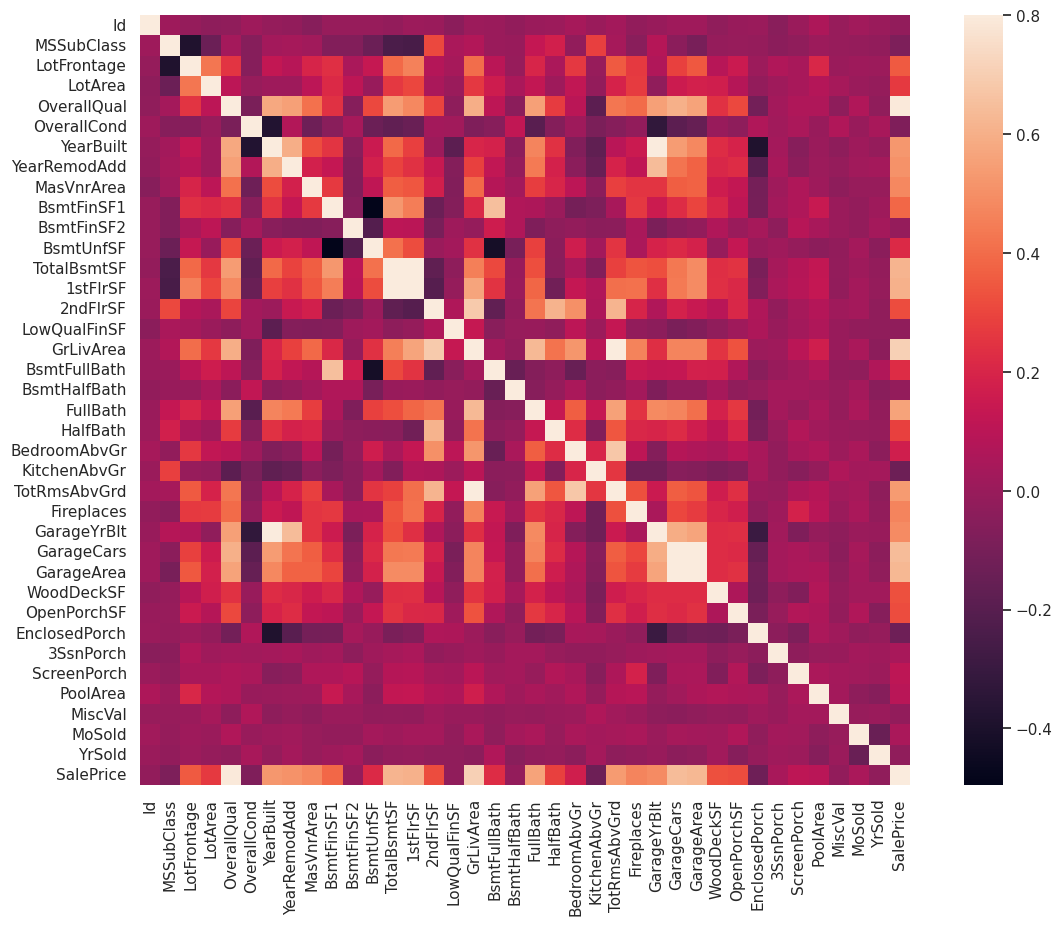

In [138]:
## correlation matrix
corrmat = df_train.corr()

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

히트맵 타입의 상관관계 지도는 유용하다. 그림을 보면 'TotalBsmtSF', '1stFlrSF', 'GarageX' 등의 상관관계가 큰 것을 알 수 있다. 경우에 따라서는 두개의 특성이 거의 동일한 정보를 포함하는 것도 있다.

가장 중요한 것은 'SalePrice'와의 상관관계이다. 이를 보면 'GrLivArea', 'TotalBsmtSF', 'OverallQual'가 관련이 많은 것을 알 수 있다. 다른 특성들도 일부 관련이 있으므로 무시할 수 없다.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

In [139]:
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [140]:
corrmat.sort_values(by='SalePrice', ascending=False).T.tail()   # just for checking

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
PoolArea,0.092404,0.065166,0.170205,0.020934,0.061047,0.126053,0.131525,0.049604,0.083757,0.004950,...,0.041709,0.020025,0.029669,0.057044,0.062157,-0.059689,-0.001985,0.008283,0.054203,-0.014525
MiscVal,-0.021190,-0.031406,-0.002416,-0.043080,-0.027400,-0.018479,-0.021096,-0.014290,0.024763,-0.034383,...,0.004940,-0.007367,1.000000,-0.006242,-0.003793,0.004906,0.068777,-0.007683,0.018361,0.062341
MoSold,0.046432,0.070815,0.050240,0.040522,0.027974,0.013196,0.031372,0.055872,0.036907,0.012398,...,-0.015211,0.032873,-0.006495,0.021172,-0.022174,-0.145721,-0.003511,-0.013585,-0.028887,0.026589
YrSold,-0.028923,-0.027347,-0.036526,-0.039117,-0.027378,-0.014969,-0.013604,-0.019669,-0.034516,-0.013618,...,0.031706,-0.046524,0.004906,0.000712,-0.028921,1.000000,0.043950,-0.021407,-0.009916,0.031687
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,...,-0.011378,-0.016844,-0.021190,-0.021917,-0.025606,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


In [141]:
# saleprice correlation matrix
# df.nlargest(): Get the rows of a DataFrame sorted by the n largest values of columns.
k = 5      #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice'); cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


In [142]:
cols = cols.index; cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [143]:
df_train[cols].values

array([[208500,      7,   1710,      2,    548],
       [181500,      6,   1262,      2,    460],
       [223500,      7,   1786,      2,    608],
       ...,
       [266500,      7,   2340,      1,    252],
       [142125,      5,   1078,      1,    240],
       [147500,      5,   1256,      1,    276]])

In [144]:
df_train[cols].corr()   # dataframe

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000


In [145]:
cm = df_train[cols].corr().values  # array
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ]])

In [146]:
# same as the above (numpy 에도 동일 기능 함수가 있음)
cm2 = np.corrcoef(df_train[cols].values.T) # Return correlation coefficients.
                                           # Each row of x represents a variable, and
                                           # each column a single observation of variables
cm2

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ]])

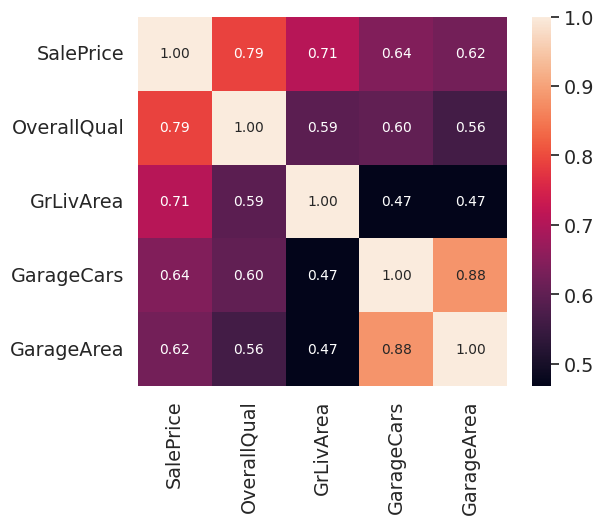

In [147]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
        fmt='.2f', annot_kws={'size': 10},
        yticklabels=cols.values, xticklabels=cols.values)
plt.show()

상관관계가 높은 순으로 정렬했다.

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'은 'SalePrice'와 상관관계가 크다.
* 'GarageCars' and 'GarageArea' 특성은 같은 의미를 갖는 것으로 보인다 (상관관계 0.88).
* 'TotalBsmtSF' and '1stFloor' 도 상관관계가 크다. (0.82)
* 'FullBath'?? Really?
* 'TotRmsAbvGrd' and 'GrLivArea' 도 상관관계가 크다(0.83).

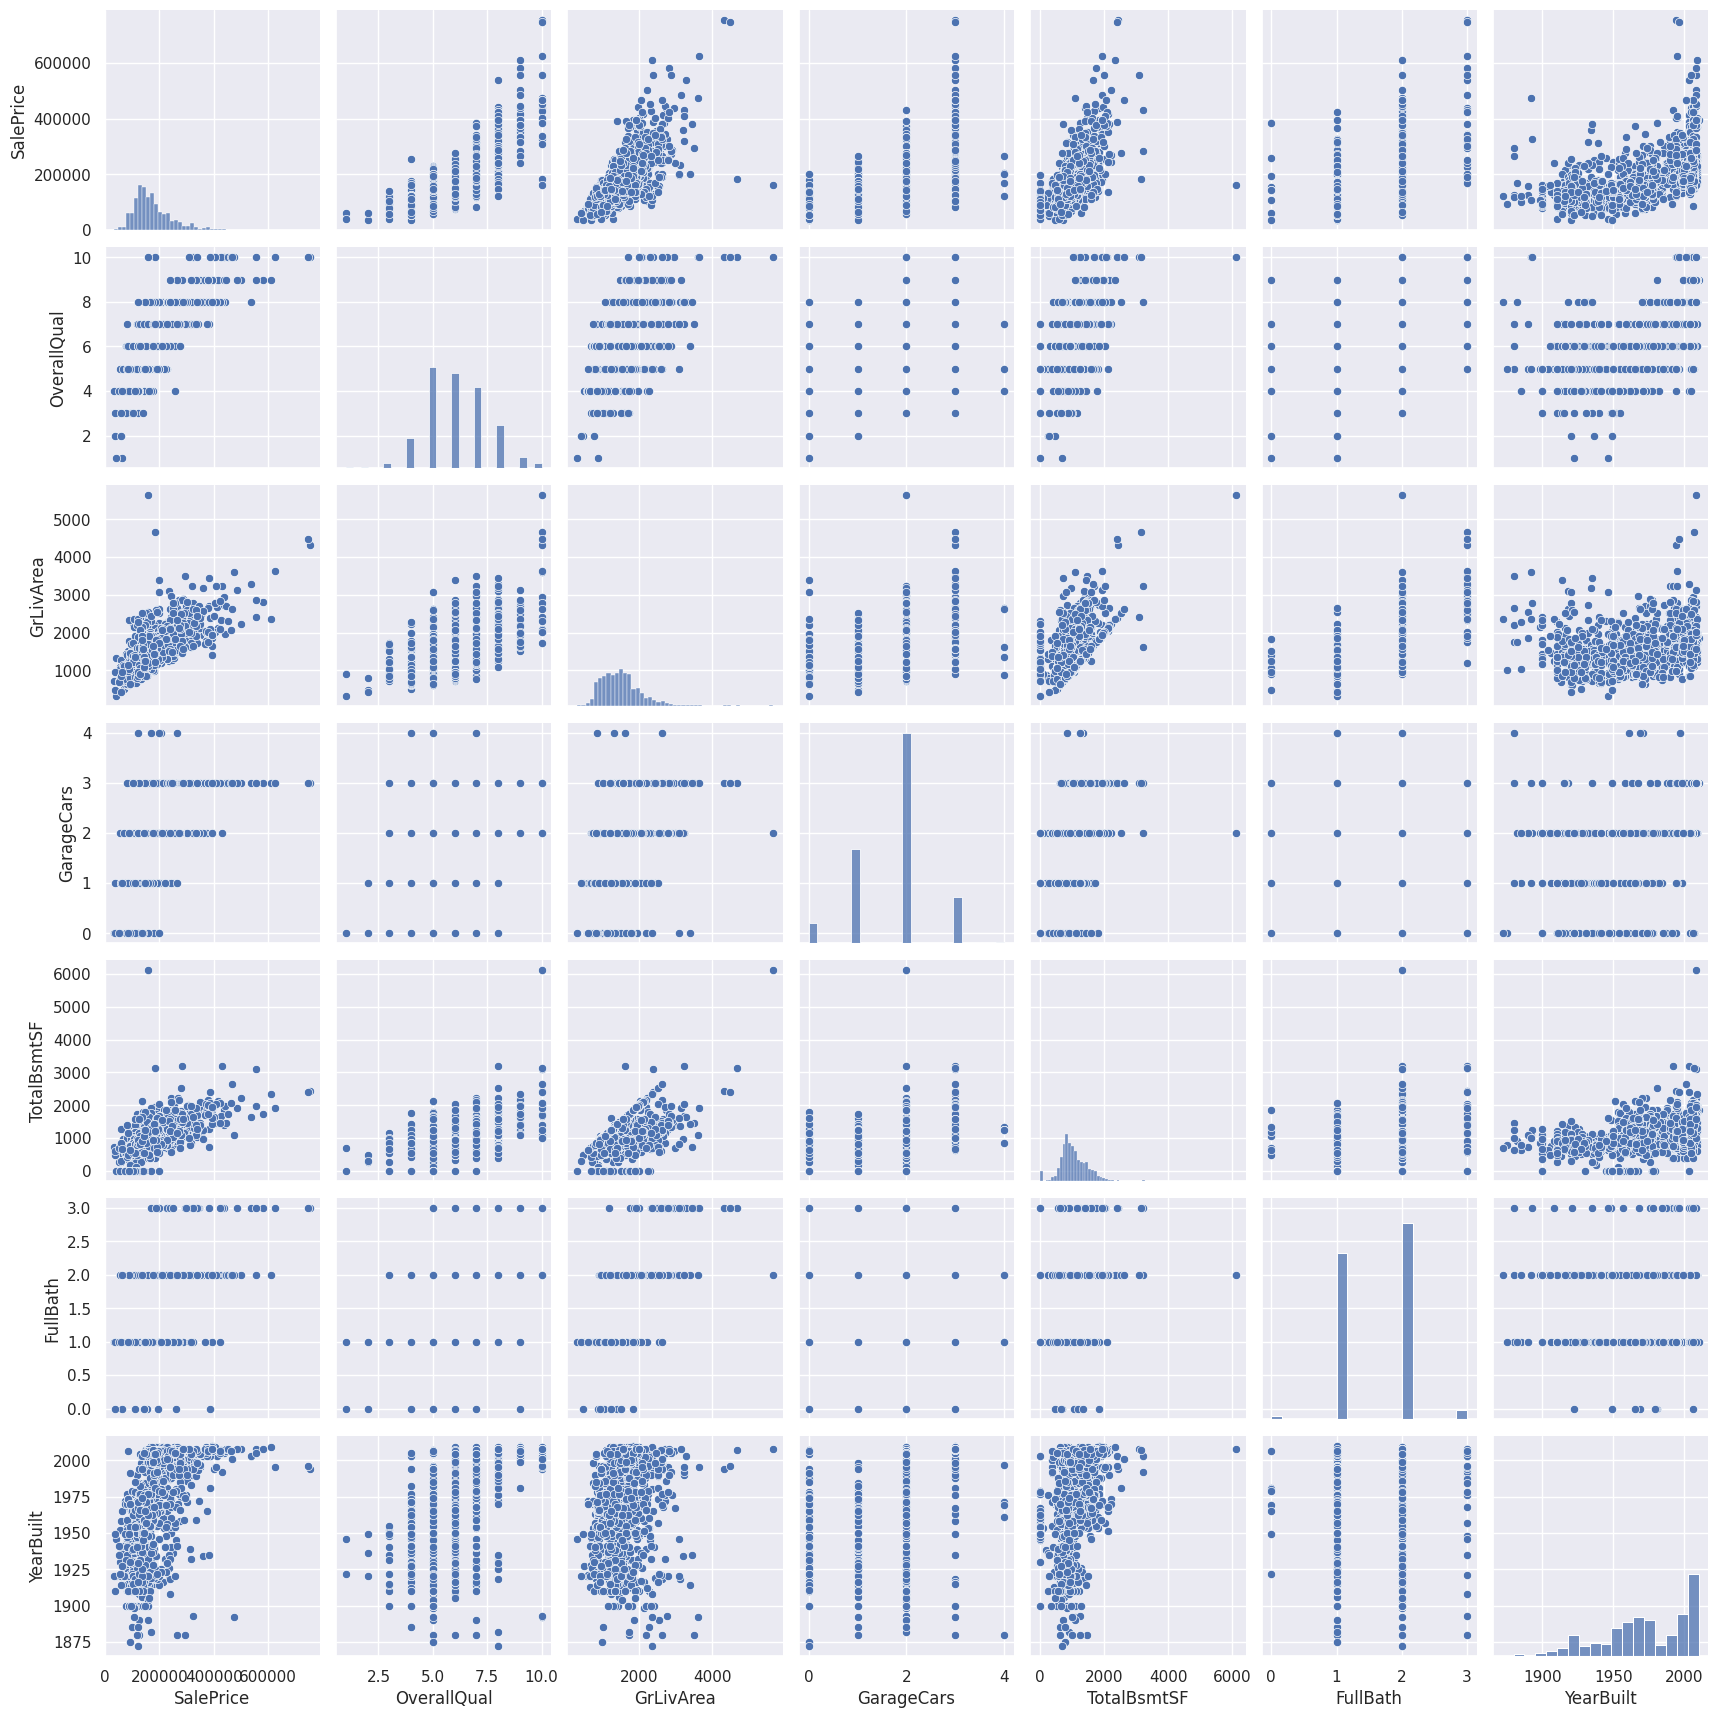

In [148]:
# 산포도
sns.set()  # default set
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
  'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

'TotalBsmtSF' and 'GrLiveArea'이 의미 있게 보인다. 산포도를 보면 직선의 한 쪽에 집중해서 나타나는 것을 알 수 있다. 지하실의 크기는 1층의 면적과 거의 같거나 작다.

'YearBuilt'도 약한 지수함수 형태를 보인다. 가격이 계속 오르고 있다.

# 결측치 처리 (Missing Values)

결측 패턴이 산발적인가, 규칙적인가?

In [149]:
#### 참고
# df_train.isnull()
# df_train.isnull().sum()
# df_train.count()          # number of non-null elements
# df_train.isnull().sum().sort_values(ascending=False)
# df_train.isna().count(), len(df_train)

In [150]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [151]:
df_train.count()  # Count non-NA cells for each column or row

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [152]:
# missing data (아래 코드는 결측치 통계를 찾는 코드이다.)
total = df_train.isnull().sum().sort_values(ascending=False)
total.head(10)

# percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### 분석 결과
- 결측률이 15% 이상이면 이 특성은 제외하고 분석하는 것이 타당하다.('PoolQC', 'MiscFeature', 'Alley' 등) 이러한 데이터의 중요도도 생각해봐야 한다.

- 'Garage*X*'의 결측치 비율이 같고, 중복성이 있다.'Bsmt*X*' 특성도 마찬가지

- 'MasVnrArea' and 'MasVnrType'는'YearBuilt'나 'OverallQual' 와 상관과계가 크므로 중복성이 있어 제외 가능하다.

- 'Electrical'는 한 값만 결측이므로 해당 샘플만 제거한다.

- 'Electrical' 외의 결측치를 관찰한 결과 모두 특성에서 제외하기로 한다.

In [153]:
df_train_org = df_train.copy()    # 만일을 위해서 (나중에 비교해 볼 필요가 있을때)

In [154]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max()            # nul 합의 최고가 0 인지 확인

0

In [155]:
df_train_org.shape, df_train.shape    # 18 개 columns , 1 row 제거

((1460, 81), (1459, 63))

# 특이값(outlier)

중요한 의미나 정보를 포함할 수 있다. 표준편차나 산포도에서 찾을 수 있다.

표준 정규화를 하여 비교한다. 상위 영역에 7 이상의 표준편차 차이가 있는 것을 알 수 있다.

In [156]:
# saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
# saleprice_scaled

saleprice_scaled = StandardScaler().fit_transform(np.array(df_train['SalePrice']).reshape(-1,1))
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [157]:
saleprice_scaled[:,0]

array([ 0.34704187,  0.0071701 ,  0.53585953, ...,  1.07713679,
       -0.48847623, -0.42081658])

In [158]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [159]:
print(df_train['SalePrice'].shape)
df_train['SalePrice'].head()         # series

(1459,)


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

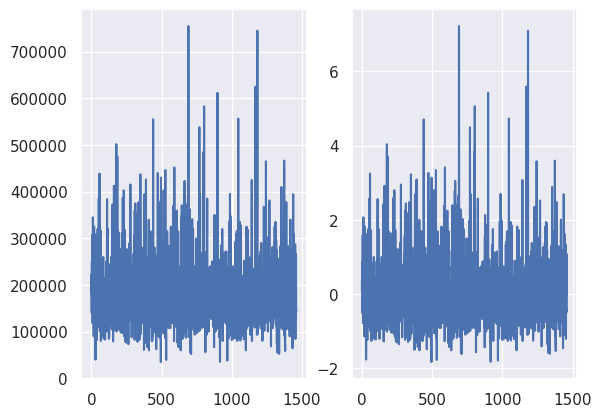

In [160]:
plt.subplot(1,2,1)
plt.plot(df_train['SalePrice'])   # if not shown, x-axis is default len(y)
plt.subplot(1,2,2)
plt.plot(saleprice_scaled)

### Bivariate 분석

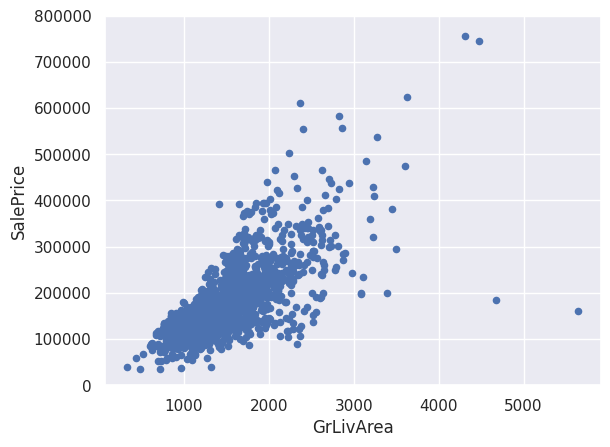

In [161]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 두 점은 트렌드를 따르지 않는 값으로 여기서는 삭제한다. 상위의 두 점은 7~ 값을 갖는 케이스인데 트렌드를 따르므로 삭제하지 않는다.

In [162]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [163]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

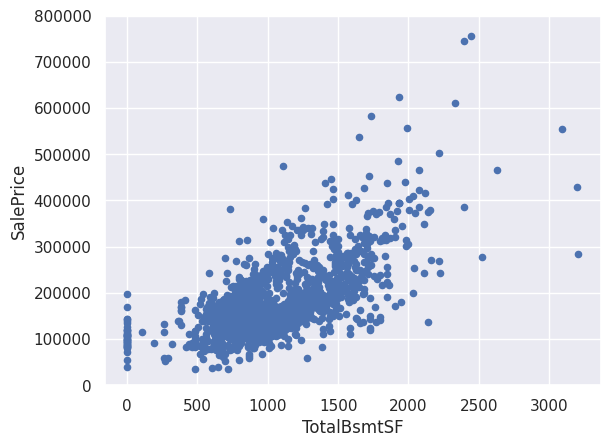

In [164]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 이상치가 있어 보이지만 그대로 둔다.

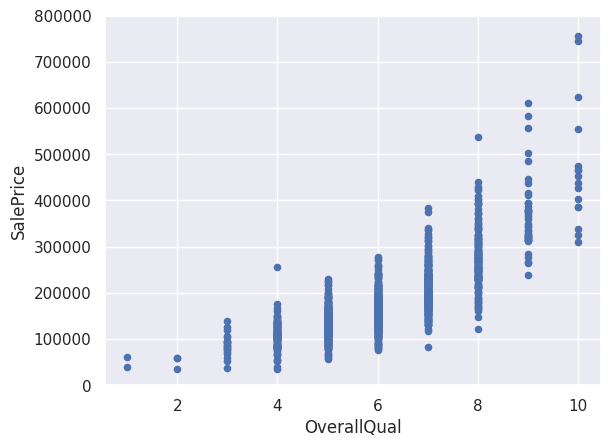

In [165]:
# bivariate analysis saleprice/overallqual
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 다음 단계

점검할 사항:

- 정규성
- 등분산성
- 선형관계성
- 상호 연관된 오류의 부재

### In the search for normality

- 히스토그램: Kurtosis and skewness (첨도 및 왜도) 점검
- Normal probability plot

- 'SalePrice'는 정규분포는 아니다. 정점(peakedness)이 존재하고 양의 왜곡(positive skewness)를 보인다. 양의 왜곡에는 로그 변환을 하면 도움이 된다.

Text(0.5, 1.0, 'original saleprice')

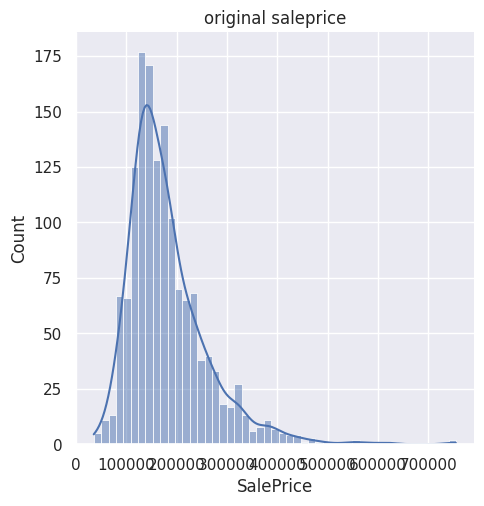

In [166]:
# 히스토그램과 정규분포 플롯
sns.displot(df_train['SalePrice'], kde=True);  #  plot the estimated PDF over the data.
plt.title('original saleprice')


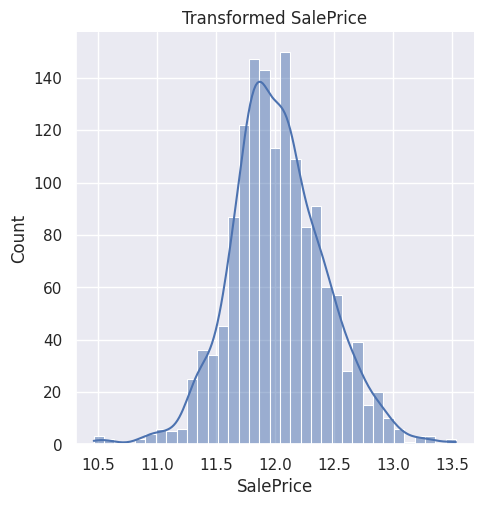

In [167]:
# 로그변환
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.displot(df_train['SalePrice'], kde=True);
plt.title('Transformed SalePrice')

plt.show()

- 'GrLivArea'에 대해서 알아보겠다.

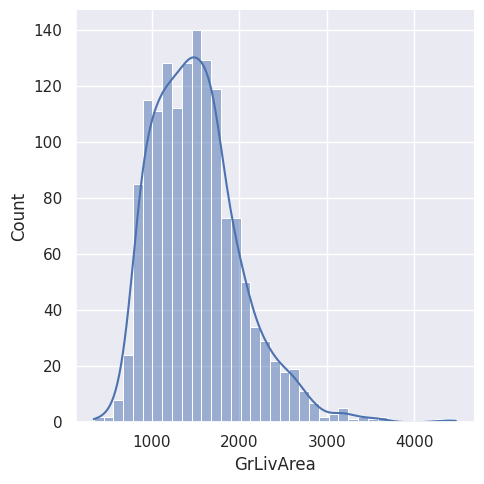

<Figure size 640x480 with 0 Axes>

In [168]:
sns.displot(df_train['GrLivArea'], kde=True);
fig = plt.figure()

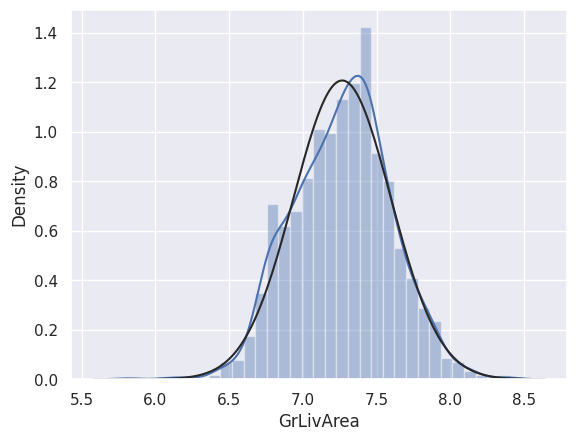

<Figure size 640x480 with 0 Axes>

In [169]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()

- TotalBsmtSF 변수에 대한 그래프

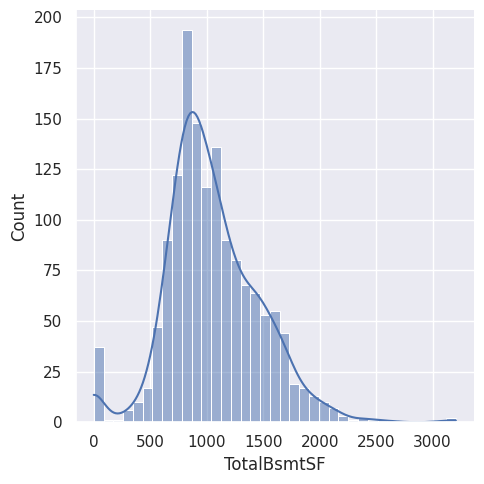

<Figure size 640x480 with 0 Axes>

In [170]:
sns.displot(df_train['TotalBsmtSF'], kde=True);
fig = plt.figure()

- 값이 0인 것은 로그 변환을 할 수 없다. 0인 경우는 '지하실 없음' 등으로 표현하고 0 이상인 값에 대해서만 로그 변환을 할 수 있다.

In [172]:
# 별도의 컬럼 추가
# area>0 이면 1, for area==0 이면 0
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train['HasBsmt'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: HasBsmt, dtype: int64

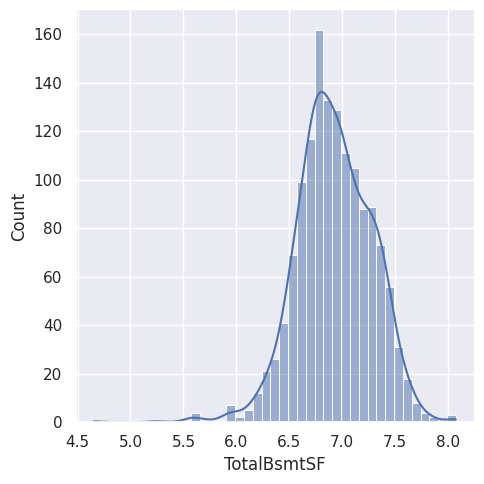

<Figure size 640x480 with 0 Axes>

In [173]:
# 양수인 경우 로그 변환
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
# 히스토그램
sns.displot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()

### homoscedasticity (동질학)
- Homoscedasticity(or homogeneity of variances), is an assumption of equal or similar variances in different groups being compared.
- This is an important assumption of parametric statistical tests.
- Uneven variances in samples result in biased and skewed test results.
- 산포도로 확인할 수 있다.

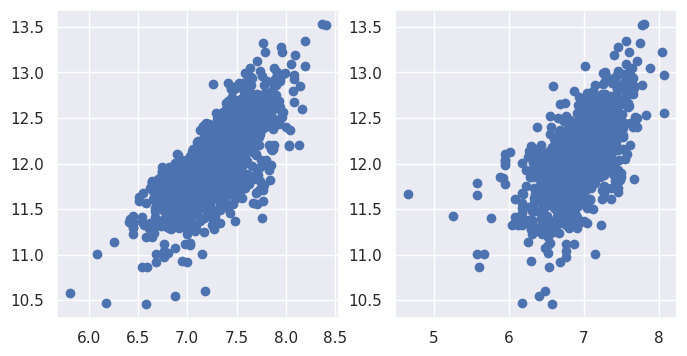

In [174]:
# scatter plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);
plt.subplot(1,2,2)
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],
            df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

# 위의 처리 이전과 이후를 비교해 보기 위해

In [175]:
df_train = df_train_org.copy()

# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# outlier
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

# log transform
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
# df_train['SalePrice'] = np.log(df_train['SalePrice'])

# log transform only on positive numbered samples
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [176]:
df_train_org.shape, df_train.shape

((1460, 81), (1457, 64))

In [177]:
### use 4 numeric columns only - original data
from sklearn.linear_model import LinearRegression,  SGDRegressor
from sklearn.model_selection import train_test_split

df = df_train_org.copy()
corrmat = df.corr()
corrmat.sort_values(by='SalePrice', ascending=False).T.tail()

cols = corrmat.nlargest(5, 'SalePrice')
df = df[cols.index]

X, y = df.values[:,1:], df.values[:,0]  # y is in the first column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
print("X data shapes (train and test): ", X_train.shape, X_test.shape)
print("Before the data cleaning: ", model.score(X_test, y_test))


X data shapes (train and test):  (1168, 4) (292, 4)
Before the data cleaning:  0.7207331927119985


In [178]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [179]:
### use 4 numeric columns only - cleaned data
df = df_train.copy()
cols = df.corr().nlargest(5, 'SalePrice')
df = df[cols.index]

X, y = df.values[:,1:], df.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("X data shapes (train and test): ", X_train.shape, X_test.shape)
print("After the data cleaning: ", model.score(X_test, y_test))

X data shapes (train and test):  (1165, 4) (292, 4)
After the data cleaning:  0.7790022536698484


- much better!

# 모두 사용:
- int64 타입이 아닌 컬럼들은 모두 LabelEncoding() or OneHotEncoding()

In [180]:
df = df_train.copy()   # pre-processed

In [181]:
df.dtypes.value_counts()

int64      34
object     28
float64     2
dtype: int64

In [182]:
# string 인 column 은 모두 LabelEncoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

for i in range(1, len(df.dtypes)-1):       # Id and HasBsmt
    if df.dtypes[i] == 'object':
        df.iloc[:,i] = LabelEncoder().fit_transform(df.iloc[:,i])

In [183]:
df = df.drop(['Id', 'HasBsmt'], axis=1)

In [184]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [185]:
X, y = df.values[:,1:-1], df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Using all the featurs: ", model.score(X_test, y_test))

Using all the featurs:  0.8871052965562679


- even better!

In [186]:
# One-hot encoding
df_cat = df_train.select_dtypes(include='object')
df_cat.shape

(1457, 28)

In [187]:
ohe = OneHotEncoder()
X_cat_enc = ohe.fit_transform(df_cat).toarray()

print(X_cat_enc.shape)

(1457, 186)


In [188]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [190]:
df_num = df_train.drop(df_cat.columns, axis=1)
df_num = df_num.drop(['Id', 'HasBsmt'], axis=1)

y = df_num['SalePrice']
X_num = StandardScaler().fit_transform(df_num.drop(['SalePrice'], axis=1))
X_num.shape

(1457, 33)

In [191]:
X_all = np.concatenate([X_cat_enc, X_num], axis=1)
X_all.shape

(1457, 219)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3)

model = SGDRegressor()
model.fit(X_train, y_train)

print("Using all the featurs: ", model.score(X_train, y_train))
print("Using all the featurs: ", model.score(X_test, y_test))

Using all the featurs:  0.9198208979458847
Using all the featurs:  0.9048865967051883


- best.

# Exercise

### new axis

In [ ]:
# exercise: newaxis (축을 새로 추가하기)
import numpy as np
x = np.array([1,2,3,4])
print(x, x.shape)
print(x[:,np.newaxis].shape)   # (4,) -> (4,1), x.reshape(4,1) 와 동일
print(x[np.newaxis,:].shape)  #  x.reshape(1,4) 와 동일

[1 2 3 4] (4,)
(4, 1)
(1, 4)


### skewness, kurtosis

0   -0.019105
dtype: float64 0   -0.062035
dtype: float64


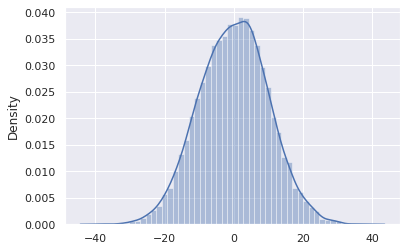

In [ ]:
sample_df = pd.DataFrame(10*np.random.randn(10000,1))
sample_df.head()
print(sample_df.skew(), sample_df.kurtosis())   # excess kurtosis = kurtosis -3
sns.distplot(sample_df, color='b')

- kurtosis(첨도): b=3 정규분포, b>3 뾰족함, b<3 평평함
- skewness(왜도): a=0 정규분포, a>0 좌측치우침, a<0 우측치우침
- excess kurtosis (초과왜도): defined as kurtosis -3
- Note: The only data values (observed or observable) that contribute to kurtosis in
  any meaningful way are those outside the region of the peak; i.e., the outliers.
  Therefore, kurtosis measures outliers only; it measures nothing about the "peak".

### print in Python

In [ ]:
# 1. 포맷 문자열 (f-문자열)
table = {'Sjoerd': 4127, 'Jack': 4098, 'Dcab': 7678}
# table.items()              # dict.items(), dict.keys(), dict.values()
for name, phone in table.items():
    print(f'{name:7s} ==> {phone:7d}')

Sjoerd  ==>    4127
Jack    ==>    4098
Dcab    ==>    7678


In [ ]:
# 2. 문자열 format 메쏘드
print('The story of {1}, {0}, and {other}.'.format('Bill', 'Manfred', other='Georg'))

The story of Manfred, Bill, and Georg.


In [ ]:
# 3. 예전의 문자열 포맷팅 (use %) - sprintf() 스타일
print('%(language)s has %(number)03d quote types.' % {'language': "Python", "number": 2})

Python has 002 quote types.


### Correlation
- np.corrcoef() and df.corr()
- df.corr() is NaN tolerant whereas np.corrcoef is not.

In [ ]:
a = np.array([1, 2, 3, 4, 5, np.nan])
b = np.array([2, 3, 4, 5.25, np.nan, 100])
print(np.corrcoef(a,b))
# ----
print(np.ma.masked_invalid(a),np.ma.masked_invalid(b))
np.ma.corrcoef(np.ma.masked_invalid(a), np.ma.masked_invalid(b))

[[nan nan]
 [nan nan]]
[1.0 2.0 3.0 4.0 5.0 --] [2.0 3.0 4.0 5.25 -- 100.0]


masked_array(
  data=[[1.0, 0.99838143945703],
        [0.99838143945703, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [ ]:
a = np.array([1, 2, 3, 4, 5, np.nan])
b = np.array([2, 3, 4, 5.25, np.nan, 100])
df = pd.concat([pd.DataFrame(a), pd.DataFrame(b)], axis=1)
df.corr()

,0,0
0,1.000000,0.998381
0,0.998381,1.000000


### something about pandas and numpy

- NaN is a numeric value, as defined in IEEE 754 floating-point standard.
- None is an internal Python type (NoneType) and would be more like "inexistent" or "empty" than "numerically invalid" in this context.
- if you compute something including nan, you will get nan. But, you can not compute None.

In [ ]:
np.nan + 2

nan

In [ ]:
None + 2

TypeError: ignored

In [ ]:
x = None        # nothing, empty, null

if x:
  print("Do you think None is True?")
elif x is False:
  print ("Do you think None is False?")
else:
  print("None is not True, or False, None is just None...")

None is not True, or False, None is just None...


In [ ]:
x = np.nan       # nothing, empty, null

if x:
    print("Do you think None is True?")
else:
    pass

Do you think None is True?


In [ ]:
df = pd.DataFrame([[1,2,3],[None, None, 1]])    # np.nan 와 동일
df

,0,1,2
0,1.0,2.0,3
1,NaN,NaN,1


In [ ]:
array = np.array([[1, np.nan, 3],
                  [4, 5, np.nan]])
pd.DataFrame(array)

,0,1,2
0,1.0,NaN,3.0
1,4.0,5.0,NaN


In [ ]:
print(pd.isna(array))
print(pd.isna(array[0]))

[[False  True False]
 [False False  True]]
[False  True False]


In [ ]:
df = pd.DataFrame([['ant', 'bee', 'cat'],
                   ['dog', 'cat' , 'fly']], columns=['A','B','C'])
df

,A,B,C
0,ant,bee,cat
1,dog,cat,fly


In [ ]:
df['A']           # column name 0 (feature), not a row index (index)

0    ant
1    dog
Name: A, dtype: object

In [ ]:
df[['A','B']]

,A,B
0,ant,bee
1,dog,cat


In [ ]:
df[:1] == df.iloc[:1]

,A,B,C
0,True,True,True


In [ ]:
df['B'] == 'cat'

0    False
1     True
Name: B, dtype: bool

In [ ]:
df[df['B'] == 'cat']['A']

1    dog
Name: A, dtype: object

In [ ]:
df.loc[df['B'] == 'cat','A']

1    dog
Name: A, dtype: object